# Exercices

## La tasse de café
Lorsque la différence $D(t)$ entre la température du café au temps $t$ et celle de l'air ambiant n'est pas trop grande, on peut considérer qu'elle varie selon la relation:

\begin{equation}
\frac{\text{d}D}{\text{d}t} = -r D(t)
\end{equation}

où $r=1/\tau$ est un paramètre positif.

1. Résoudre cette équation avec la méthode d'Euler entre 0 et 30 mn, pour la condition initiale $D(0) = 65.3$ degrés et la valeur du paramètre $r = 0.1$ mn$^{-1}$. On prendra un pas de 0.5 mn. 

2. Comparer graphiquement la solution numérique avec la solution analytique:

\begin{equation}
D (t) = D_0 e^{-rt} 
\end{equation}

3. Représenter graphiquement l'erreur relative entre les 2 méthodes

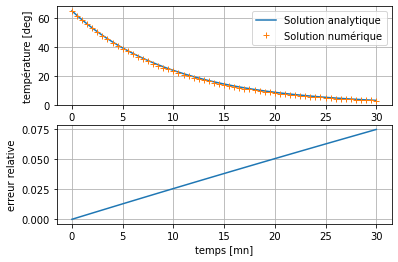

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# paramètres
r = 0.1 # mn^-1
ti = 0 # mn
te = 30 # mn
step = 0.5 # mn
ordre = 1

# conditions initiales
D_ini = 65.3 # degrés

# loi de decroissance
def derivee_D (D, t):
    '''
        Loi de décroissance dD/dt = - r D
    '''
    return -r * D

# méthode d'Euler
def Euler(start, end, step, v_ini, derivee, ordre):
    '''
        Application de la méthode d'Euler
    '''
    # Création du tableau temps
    interval = end - start                     # intervalle
    num_points = int(interval / step) + 1      # nombre d'éléments
    t = np.linspace(start, end, num_points)    # tableau temps t

    # initialisation du tableau v
    v = np.empty((ordre, num_points))

    # condition initiale
    v[:,0] = v_ini 

    # boucle for
    for i in range(num_points - 1):
        v[:,i+1] = v[:,i] + step * derivee(v[:,i],t[i])

    # argument de sortie
    return t, v

# methode d'Euler
t, Deu = Euler(ti, te, step, D_ini, derivee_D, ordre)

# solution analytique
Da = D_ini * np.exp(-r * t)

# comparaison des solutions
plt.subplot(2,1,1)
plt.plot(t, Da, label = 'Solution analytique')
plt.plot(t, Deu[0,:], '+', label = 'Solution numérique')
plt.ylabel('température [deg]')
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.plot(t, np.abs((Deu[0,:] - Da)/Da))
plt.ylabel("erreur relative")
plt.xlabel('temps [mn]')
plt.grid()
plt.show()

## Méthodes de Runge-Kutta
La méthode d'Euler est simple à programmer mais est toutefois peu précise au delà des temps
courts. Il existe de nombreuses méthodes pour y remédier. 
Une classe de méthodes couramment utilisés sont les méthodes de Runge-Kutta présentés ci-dessous.

Considérons les  équations différentielles ordinaires d'ordre 1 de la forme:
\begin{equation} 
    u'(t) = F(u,t)
\end{equation}
avec une  condition initiale:
\begin{equation} 
u(0) = U_0
\end{equation}
où $u$ est une quantité scalaire ou vectorielle.

L'intégration de l'EDO entre $t_k$ et $t_{k+1}= t_k+\Delta t $ 
donne formellement:
\begin{equation}
u(t_{k+1})-u(t_k) = \int_{t_k}^{t_k+\Delta t} \, F(u(t),t)\,\text{d}t
\end{equation}
Dans la méthode d'Euler explicite, l'intégrale est approximée par
\begin{equation}
\int_{t_k}^{t_k+\Delta t} \, F(u(t),t)\,\text{d}t = F(u(t_k),t_k) \text{d}t
\end{equation}
A chaque pas l'erreur est de l'ordre de $M(\Delta t)^2/2$ où $M$ est l'ordre
de grandeur de la dérivée de $F$ par rapport à $t$.
Au bout de $N$ pas d'intégration l'erreur cumulée est donc de l'ordre
de $\Delta t$ (et on voit facilement qu'il en sera de même pour la méthode implicite).
D'où la qualification de méthode d'ordre 1 en $\Delta t$ donnée à la méthode d'Euler. 

## Methodes de Runge-Kutta (explicite) d'ordre 2 (méthodes RK2):
               
On peut améliorer l'estimation $u_{k+1}$ de $u(t_{k+1})$ en évaluant $F$ à un point 
intermédiaire, par exemple le point milieu du pas d'intégration et refaire l'intégration
de $u$ à partir de $t_k$ en utilisant cette évaluation de l'intégrand :

\begin{eqnarray}
    d_1 &=& F(u_k, t_k) \\
    u_{k,1} &=& u(t_k)+ d_1 \frac{\Delta t}{2} \\
    d_2 &=& F\left(u_{k,1}, t_k + \frac{\Delta t}{2} \right) \\         
    u_{k+1} &=&  u_k  + d_2 \Delta t \;.
\end{eqnarray}

D'où le nom de méthode RK2 du point milieu. On peut montrer que les erreurs cumulées sont d'ordre $\Delta^2$,
d'où le nom de méthode de Runge-Kutta d'ordre 2.

1. Adapter le script de la méthode d'Euler ci-dessous pour appliquer la méthode rk2 et tester la méthode pour le problème du refroidissement de la tasse de café

In [2]:
# méthode d'Euler
def Euler(start, end, step, v_ini, derivee, ordre):
    '''
        Application de la méthode d'Euler
    '''
    # Création du tableau temps
    interval = end - start                     # intervalle
    num_points = int(interval / step) + 1      # nombre d'éléments
    t = np.linspace(start, end, num_points)    # tableau temps t

    # initialisation du tableau v
    v = np.empty((ordre, num_points))

    # condition initiale
    v[:,0] = v_ini 

    # boucle for
    for i in range(num_points - 1):
        v[:,i+1] = v[:,i] + step * derivee(v[:,i],t[i])

    # argument de sortie
    return t, v

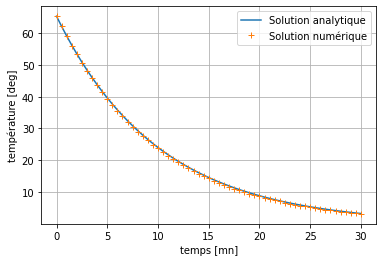

In [3]:
def rk2(start, end, step, v_ini, derivee, ordre):
    '''
        Application de la méthode rk2
    '''
    # Création du tableau temps
    interval = end - start                     # intervalle
    num_points = int(interval / step) + 1      # nombre d'éléments
    t = np.linspace(start, end, num_points)    # tableau temps t

    # initialisation du tableau v
    v = np.empty((ordre, num_points))

    # condition initiale
    v[:,0] = v_ini 

    # boucle for
    for i in range(num_points - 1):
        d1 = derivee(v[:,i], t[i])
        v1 = v[:,i] + step/2 * d1
        d2 = derivee(v1, t[i] + step/2)
        v[:,i+1] = v1 + step/2 * d2

    # argument de sortie
    return t, v

# methode rk2
t, Drk2 = rk2(ti, te, step, D_ini, derivee_D, ordre)

# comparaison des solutions
plt.plot(t, Da, label = 'Solution analytique')
plt.plot(t, Drk2[0,:], '+', label = 'Solution numérique')
plt.xlabel('temps [mn]')
plt.ylabel('température [deg]')
plt.grid()
plt.legend()

2. Calculer l'erreur relative en fonction du temps et comparer à la méthode d'Euler

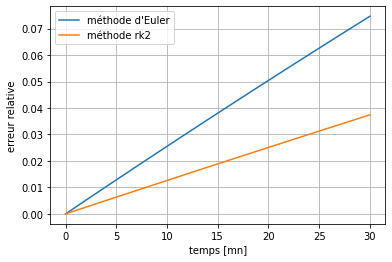

In [4]:
# comparaison des méthodes
plt.plot(t, np.abs((Deu[0,:] - Da)/Da), label = "méthode d'Euler")
plt.plot(t, np.abs((Drk2[0,:] - Da)/Da), label = "méthode rk2")
plt.ylabel("erreur relative")
plt.xlabel('temps [mn]')
plt.legend()
plt.grid()
plt.show()

## Methodes de Runge-Kutta (explicite) d'ordre 4 (méthodes RK4)
Nous nous limiterons au schéma d'intégration suivant, couramment  utilisé, basé sur une estimation de l'intégrale par la méthode de Simpson:

\begin{eqnarray}
    d_1 &=&   F(t_k   , u_{k} ) \nonumber    \\                
    d_2 &=&   F(t_k + \frac{\Delta t}{2}  , u_{k} + \frac{\Delta t}{2} d_1 ) \nonumber    \\  
    d_3 &=&   F(t_k + \frac{\Delta t}{2}  , u_{k} + \frac{\Delta t}{2} d_2 ) \nonumber    \\ 
    d_4 &=&   F(t_k + \Delta t  , u_{k} + \Delta t d_3) \nonumber    \\                        
    u_{k+1} &=&  u_k  +  \frac{\Delta t}{6} \left[ d_1+ 2 d_2  + 2 d_3 + d_4 \right]
\end{eqnarray}   

où l'erreur par pas est d'ordre $\Delta t^5$ et l'erreur cumulée est  d'ordre $\Delta t^4$.

1. Adapter la fonction de la méthode d'Euler de l'exercice précédent pour appliquer la méthode rk4, et tester la méthode pour le problème du refroidissement de la tasse de café

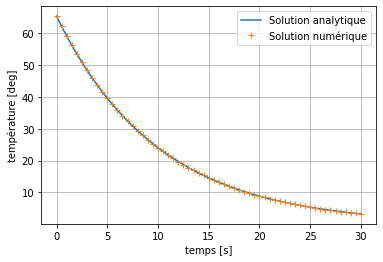

In [5]:
# méthode rk4
def rk4(start, end, step, v_ini, derivee, ordre):
    '''
        Application de la méthode rk4
    '''
    # Création du tableau temps
    interval = end - start                     # intervalle
    num_points = int(interval / step) + 1      # nombre d'éléments
    t = np.linspace(start, end, num_points)    # tableau temps t

    # initialisation du tableau v
    v = np.empty((ordre, num_points))

    # condition initiale
    v[:,0] = v_ini 

    # boucle for
    for i in range(num_points - 1):
        d1 = derivee(v[:,i], t[i])
        d2 = derivee(v[:,i] + step/2 * d1, t[i] + step/2)
        d3 = derivee(v[:,i] + step/2 * d2, t[i] + step/2)
        d4 = derivee(v[:,i] + step * d3, t[i] + step)
        v[:,i+1] = v[:,i] + step/6 * (d1 + 2*d2 + 2*d3 + d4)

    # argument de sortie
    return t, v

# methode rk4
t, Drk4 = rk4(ti, te, 0.5, D_ini, derivee_D, ordre)

# comparaison des solutions
plt.plot(t, Da, label = 'Solution analytique')
plt.plot(t, Drk4[0,:], '+', label = 'Solution numérique')
plt.xlabel('temps [s]')
plt.ylabel('température [deg]')
plt.grid()
plt.legend()
plt.show()

2. Calculer l'erreur relative en fonction du temps et comparer à la méthode d'Euler et rk2

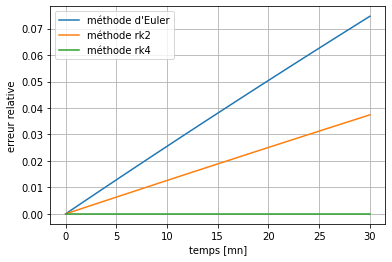

In [6]:
# comparaison des méthodes
plt.plot(t, np.abs((Deu[0,:] - Da)/Da), label = "méthode d'Euler")
plt.plot(t, np.abs((Drk2[0,:] - Da)/Da), label = "méthode rk2")
plt.plot(t, np.abs((Drk4[0,:] - Da)/Da), label = "méthode rk4")
plt.ylabel("erreur relative")
plt.xlabel('temps [mn]')
plt.legend()
plt.grid()
plt.show()